--------------------------------------------------------------------------------------

* Team member names: Ittoop Shinu Shibu, Bernard Wong 
* Team member IDs: A13719148, A15268417

--------------------------------------------------------------------------------------


# Mini-project 2, DSC 170, Spring 2019
## Advanced Geopandas: spatial join and geoprocessing


In this mini-project, you will explore several common geospatial computations. The goal is to practice with different types of requests against a single layer, and then work on joining several data layers using real data. The goal is to demonstrate your geopandas mastery, and also to show that you can discover datasets and critically evaluate metadata. 

For each dataset that you found and used, explore its metadata and provide a brief description (about 3 sentences): indicate its title, URL, number of records, coordinate reference system, the manner in which it was compiled (as far as you can tell from the metadata), and any data quality considerations, especially those that may influence geometric processing. 

There will be one relatively simple warm-up problem, and one larger and very real problem that the City of San Diego is struggling with. The best creative solutions to the second one will be demonstrated when Scale-SD folks come here to give an invited talk.

Note that the upload file size limit has been removed from the datahub, so you should be able to upload your data.



In [2]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd

# add packages as needed
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

--------------------------------------------------------------------------------------
__Problem 1__. 

In an administrative boundaries map of California (find it as a GeoJSON or a shapefile on one of the web sites), find a county named San Diego and return its CRS, polygon coordinates, area (in sq miles), bounding box (in latitude and longitude), and a list of neighboring counties. 

Generally speaking, this will be a function to return geometric characteristics and neighbors of any polygon in an input dataframe (input_gdf) with a given name (poly_name) in a specific column (poly_name_field). Most lilely, in the database you find there will be a unique "San Diego" record - but it won't harm to do dissolve, just in case.

```python
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors
```



### Solution for problem 1: code and dataset description:

In [3]:
# problem 1 solution stud code
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors

In [4]:
def poly_geometry(input_gdf, poly_name_field, poly_name):
    #get crs of the input gdf
    crs = input_gdf.crs
    #take out fields that are meant to be dissolved
    temp = input_gdf[[poly_name_field, 'geometry']]
    #dissolve the gdf into a series
    dissolved = temp.dissolve(by=poly_name_field)
    #find the poly_name in the series that was just dissolved
    data_line = dissolved.loc[poly_name]
    #get the coordinates
    poly_coords = data_line.geometry
    #get the bounding box
    bounding_box = poly_coords.envelope
    #get area and convert to square miles
    area = poly_coords.area/2.59e+6
    #get neighbours of poly_name
    neighbors = list(dissolved[dissolved.touches(poly_coords)].index)
    return crs, poly_coords, area, bounding_box, neighbors

__Problem 1 dataset description:__

EXPLAIN THE INFORMATION FOR CA COUNTIES TIGER 2016. It primarily holds the data of each county along with a lot of other additional columns of information that we primarily didn't use; the only columns we focused on were NAME and geometry. There are 58 counties available in the dataframe. In general the data is pretty complete and as a result we do not need to worry about missing data or null values, which helps a lot with data processing. However, there were some issues with edges, so as a result we utilized dissolve to fix up any issues.

In [5]:
# running the function

input_gdf = gpd.read_file('  your file here  ')
poly_name_field = 'Counties'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file

crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

print(crs)
print(poly_coords)
print(area)
print(bbox)
print(neighbors)


DriverError:   your file here  : No such file or directory

In [6]:
input_gdf = gpd.read_file('CA_Counties/CA_Counties_TIGER2016.shp')
poly_name_field = 'NAME'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file
crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

print(crs)
print(poly_coords)
print(area)
print(bbox)
print(neighbors)

{'init': 'epsg:3857'}
POLYGON ((-13073075.79626082 3919158.523585408, -13074423.87563419 3920902.47721807, -13076464.91901261 3923543.711931496, -13078660.91913112 3925902.610879234, -13080041.61510469 3927385.900115226, -13080090.26173377 3927438.207978337, -13080138.90836285 3927490.382976819, -13080291.63874351 3927700.150130602, -13080749.94120505 3928329.740504297, -13080902.78290524 3928539.655904703, -13080999.63088913 3928704.050129639, -13081290.28616034 3929197.779222346, -13081387.24546376 3929362.448991434, -13082379.10240236 3931047.486195687, -13083206.65169404 3931931.572704588, -13085563.0632365 3934449.19100154, -13088004.3002369 3936831.216795951, -13089923.22602628 3938090.488726339, -13092406.98703168 3939720.831299472, -13092402.31161339 3939738.552226207, -13092140.15423615 3940814.249824201, -13091340.88036454 3944095.790244014, -13091074.49284728 3945189.887839851, -13091022.50665081 3945419.037582617, -13090866.88201995 3946107.047241335, -13090815.00714301 394

--------------------------------------------------------------------------------------

__Problem 2.__

Food choices in low and medium income (LMI) neighborhoods are limited, as these areas lack healthy food stores or other fresh food delivery mechanisms. There may be more fast food stores than fresh produce shops. Population is relatively poor, and filling the food basket with healthy options hasn't been an overwhelming priority for many households. Such areas are referred to as "food deserts". 

See these articles:
* https://www.sandiegouniontribune.com/news/data-watch/sdut-san-diego-food-deserts-2016may15-htmlstory.html (see food desert definitions here)
* https://www.npr.org/sections/thesalt/2013/03/13/174112591/how-to-find-a-food-desert-near-you
* https://www.geospatial.institute/wp-content/uploads/2018/03/Mapping-Food-Desserts-in-Southern-California-Counties.pdf 
* https://www.sandiegoreader.com/news/2018/sep/04/stringers-imperial-beach-food-desert/# (a recent one, about IB)
* https://www.kpbs.org/news/2018/mar/29/sdsu-students-take-food-deserts-national-city/
* http://newscenter.sdsu.edu/sdsu_newscenter/news_story.aspx?sid=74890 
* https://grist.org/food/americas-worst-food-deserts-map-lovers-edition/
* https://ucsdcommunityhealth.org/news/promoting-produce-consumption/

There was also a Master's thesis at UCSD: https://escholarship.org/uc/item/0s78j9g2

Don't read them all, just skim to understand the issues and get ideas.

We'll analyze the current state of food deserts, using lists of businesses that operate in San Diego, and social-demographic data from SanDAG (by census tracts). 

For the list of businesses, let's use City of San Diego tax certificates:
https://data.sandiego.gov/datasets/business-listings/. These data are current, and include lat/lon. They also include detailed NAICS codes for each business. This is the recommended dataset. We are interested in active certificates. We are also interested in types of businesses that are relevant to healthy (and unhealthy) food options. Healthy food options would include FOOD (HEALTH) SUPPLEMENT STORES, GROCERY STORES and GROCERY (EXCEPT CONVENIENCE) STORES. Unhealthy food options would include FOOD SERVICES & DRINKING PLACES, FULL-SERVICE RESTAURANTS, LIMITED-SERVICE EATING PLACES, LIMITED-SERVICE RESTAURANTS (a.k.a fast food places), BEER, WINE & LIQUOR STORES, TOBACCO STORES, CONVENIENCE STORES (a mixed bag...). We have provided this as part of the assignment. You don't need to download it, but you may if you wish.


There is also "SanDAG's point locations of business sites" in San Diego County (see metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=BUSINESS_SITES.pdf). This is already a shapefile, so this is a plus (but note  disclaimers in the metadata). The date is 8/17/2017, i.e. not as current. Industry codes are not as detailed as NAICS in the City's dataset. 

We'll also get relevant spatial data layers from SanDAG: Promise Zone, and census tract boundaries. Note that you'll need to create a free account to access Sandag GIS data warehouse.

Descriptions of promise zones can be found at these links:
* https://www.hud.gov/sites/documents/SAN-DIEGO_ZONE_3RD.PDF
* https://www.sandiego.gov/economic-development/sdpromisezone/maps
* https://www.sandiego.gov/economic-development/sdpromisezone

To download the shapefiles, visit the SanDAG's "Maps and GIS" section:
* Promise Zone is under Business. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=Promise_Zone_SD.pdf. Alternatively, you can use https://data.sandiego.gov/datasets/promise-zone/
* Census tracts are under Census. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Census&Name=CENSUS_TRACTS_2010.pdf. 

Social-demographic data by census tracts can be downloaded from SanDAG at https://sandag.org/index.asp?classid=26&fuseaction=home.classhome. You can try to find the data yourself - but  we also include an xlsx file with some income statistics by census tracts. 

San Diego County municipal boundaries (metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Jurisdiction&Name=Municipal_Boundaries.pdf) can be downloaded from the same GIS Data Warehouse, under the "Jurisdiction" section. Alternatively, use https://data.sandiego.gov/datasets/san-diego-boundary/ (we only need the boundary of San Diego city, so the latter is quite sufficient.)

Your tasks:

1. Download the data - promise zone, census tracts, jurisdictions (census tracts social-demographic data and businesses data are provided but you can download as well if you wish), read them into geopandas dataframes, and merge social-demographic data with tract boundaries as needed.

2. Subset the businesses (figure out, from NAICS descriptions, which businesses are likely to provide healthy food options, and which unhealthy. You can use our suggestions above but also feel free to deviate from them as long as you justify your choices.)

3. Determine census tracts intersecting with the promise zone, and all other census tracts within the boundary of San Diego.

4. For each census tract marked as belonging to the promise zone, and the other tracts within the city limits, calculate the number of healthy and not-healthy options within that tract. 

5. Compute the ratio of healthy and non-healthy options, and build a regression model showing how it depends on social-demographic characteristics, such as median income or number of people in lowest and highest income brackets. You may use sklearn on this dataframe by tracts to compute a linear regresson (as you did in DSC80. As a refresher, you may also check out https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9, https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606, https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn/29937049). Provide a brief description of regression results.

6. Generate a map showing the ratio of healthy and not healthy food options, and the locations of stores offering healthy food options. 

7. Extra Credit: Think of additional variables that you could bring into this analysis, and try to include them in the regression. ScaleSD is running a hackathon on this topic, and they have a good collection of data sources: https://www.scalesd.com/hackathon-2019/food-insecurity.html. 


We won't provide a skeleton for this problem. This is a much more open project than before. 


### Solution for problem 2: code, dataset descriptions, discussion of regression results:

__Problem 2 dataset descriptions:__

 Your text here

PART 1

In [7]:
# reading in all the files 
census_tracts = gpd.read_file('Census_Tracts/CENSUS_TRACTS_2010.shp')

In [8]:
Promise_zone = gpd.read_file('Promise_zone/promise_zone_datasd.shp')

In [9]:
jurisdictions = gpd.read_file('Municipal_boundaries/MUNICIPAL_BOUNDARIES.shp')

In [10]:
#reading data
socio_dem = pd.read_excel('socio-demographic.xlsx')
#taking the latest year
socio_dem = socio_dem[socio_dem['YEAR']==2016]
#reshaping dataset for merge with census data
socio_dem = socio_dem[['TRACT','INCOME GROUP','HOUSEHOLDS']].groupby(['TRACT','INCOME GROUP']).sum().reset_index()
socio_dem = socio_dem.pivot(index='TRACT', columns='INCOME GROUP', values='HOUSEHOLDS')
total = socio_dem.apply(sum, axis=1)
socio_dem['Total'] = total

In [11]:
#getting data from dataset
businesses = pd.read_csv('sd_businesses_active_since08_datasd.csv')
#converting dataset to geopanda dataframe
def convert_to_geoseries(row):
    return gpd.GeoSeries([Point(row['longitude'], row['latitude'])])
point_column = businesses.apply(func=convert_to_geoseries, axis=1)
businesses['geometry'] = point_column
businesses = gpd.GeoDataFrame(businesses)

In [12]:
#merging census data with socio demographic dataset
socio_dem_census = socio_dem.merge(census_tracts,how='inner', on='TRACT')
geo_socio_dem_census = gpd.GeoDataFrame(socio_dem_census)

PART 2

In [13]:
#PART 2
healthy = ['FOOD (HEALTH) SUPPLEMENT STORES', 'GROCERY STORES','GROCERY (EXCEPT CONVENIENCE) STORES']

unhealthy = ['FOOD SERVICES & DRINKING PLACES', 'FULL-SERVICE RESTAURANTS', 
 'LIMITED-SERVICE EATING PLACES', 'LIMITED-SERVICE RESTAURANTS', 
 'BEER', 'WINE & LIQUOR STORES', 'TOBACCO STORES', 'CONVENIENCE STORES'] 


In [14]:
#separating healthy food places
df = [] 
for i in healthy:
    temp_df = businesses[businesses['naics_description']==i]
    df.append(temp_df)
healthy_stores = pd.concat(df)

In [15]:
#separating unhealthy food places
df = [] 
for i in unhealthy:
    temp_df = businesses[businesses['naics_description']==i]
    df.append(temp_df)
unhealthy_stores = pd.concat(df)

PART 3

In [16]:
# PART 3
sd_boundary = gpd.read_file('San_Diego_boundary/san_diego_boundary_datasd.shp')
san_diego = sd_boundary.dissolve(by='code')

In [17]:
#getting tracts that intersect with promise zone
tracts_promise_zone = geo_socio_dem_census[geo_socio_dem_census.intersects(Promise_zone.loc[0,'geometry'])]
in_promise = list(np.full(len(tracts_promise_zone), True))

In [18]:
#getting tracts that are within san diego boundary
tracts_san_diego = geo_socio_dem_census[geo_socio_dem_census.within(san_diego.loc[0, 'geometry'])]
for i in range(len(tracts_san_diego)):
    in_promise.append(False)

In [19]:
#combining tracts
tracts_combined = pd.concat([tracts_promise_zone, tracts_san_diego])
tracts_combined['In Promise Zone'] = in_promise

In [20]:
#converting the gdf's to appropriate crs (for healthy and unhealthy stores)
tracts_combined.crs = {'init':'epsg:2230'}
healthy_stores.crs = {'init':'epsg:4326'}
unhealthy_stores.crs = {'init':'epsg:4326'}
healthy_stores = healthy_stores.to_crs({'init':'epsg:2230'})
unhealthy_stores = unhealthy_stores.to_crs({'init':'epsg:2230'})
healthy_stores = healthy_stores.reset_index()
unhealthy_stores = unhealthy_stores.reset_index()


In [21]:
#dissolving similar tracts 
tracts_combined = tracts_combined.dissolve(by='TRACT')
tracts_combined = tracts_combined.reset_index()

PART 4

In [22]:
#getting number of healthy and unhealthy options in each tract
healthy = []
unhealthy = []
for i in range(len(tracts_combined)):
    healthy.append(len(healthy_stores[healthy_stores.within(tracts_combined['geometry'][i])]))
    unhealthy.append(len(unhealthy_stores[unhealthy_stores.within(tracts_combined['geometry'][i])]))

In [23]:
#adding the numbers to the gdf
tracts_combined['NUM OF HEALTHY'] = healthy
tracts_combined['NUM OF UNHEALTHY'] = unhealthy

PART 5

In [24]:
healthy_stores.shape

(112, 27)

In [25]:
unhealthy_stores.shape

(1829, 27)

In [26]:
# ratios 
total_health_stores = healthy_stores.shape[0]+unhealthy_stores.shape[0] # total health related stores 
healthy_ratio, unhealthy_ratio = healthy_stores.shape[0]/total_health_stores,unhealthy_stores.shape[0]/total_health_stores
print(healthy_ratio, unhealthy_ratio)

0.05770221535291087 0.9422977846470891


In [27]:
added_ratios = tracts_combined.copy() # adding the stores to a new dataframe with proper ratios 
added_ratios['RATIO HEALTHY'] = added_ratios['NUM OF HEALTHY']/(added_ratios['NUM OF HEALTHY']+added_ratios['NUM OF UNHEALTHY'])
added_ratios['RATIO UNHEALTHY'] = added_ratios['NUM OF UNHEALTHY']/(added_ratios['NUM OF HEALTHY']+added_ratios['NUM OF UNHEALTHY'])
added_ratios['RATIO HEALTHY'] = added_ratios['RATIO HEALTHY'].fillna(0) # filled any nulls with 0 since it was due to divide by 0
added_ratios['RATIO UNHEALTHY'] = added_ratios['RATIO UNHEALTHY'].fillna(0)
added_ratios.head()

,TRACT,geometry,"$100,000 to $124,999","$125,000 to $149,999","$15,000 to $29,999","$150,000 to $199,999","$200,000 or more","$30,000 to $44,999","$45,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","Less than $15,000",Total,SHAPE_AREA,SHAPE_LEN,In Promise Zone,NUM OF HEALTHY,NUM OF UNHEALTHY,RATIO HEALTHY,RATIO UNHEALTHY
0,1.00,"POLYGON ((6273121 1857292, 6273168.000249997 1...",158,117,84,181,411,36,6,42,176,122,1333,1.656757e+07,19820.936427,False,0,0,0.000000,0.000000
1,2.01,"POLYGON ((6278383.999750003 1856813, 6278375 1...",141,44,121,128,188,108,74,11,136,83,1034,8.250975e+06,11854.098818,False,0,5,0.000000,1.000000
2,2.02,"POLYGON ((6276705.420750007 1854067.768000007,...",233,116,300,135,247,215,305,159,372,189,2271,1.370893e+07,18073.476045,False,0,4,0.000000,1.000000
3,3.00,"POLYGON ((6279822.865999997 1853534.077999994,...",343,206,121,214,252,205,430,244,409,503,2927,9.790827e+06,14614.226517,False,0,23,0.000000,1.000000
4,4.00,"POLYGON ((6281407.650000006 1857087.834999993,...",247,136,98,70,69,267,448,383,328,121,2167,1.300128e+07,16192.890032,False,1,21,0.045455,0.954545


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

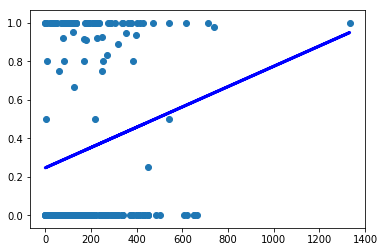

In [29]:
lm = LinearRegression()
X = added_ratios['Less than $15,000']
X = np.array(list(X)).reshape(-1, 1)
y = added_ratios['RATIO UNHEALTHY'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm.fit(X_train,y_train)
prediction =lm.predict(X_test)
plt.scatter(X_test, y_test)
# linear regression of ratio of unhealthy to number of people in the lowest bracket
plt.plot(X_test, prediction, color='blue', linewidth=3)

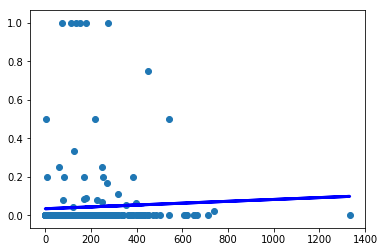

In [30]:
X = added_ratios['Less than $15,000']
X = np.array(list(X)).reshape(-1, 1)
y = added_ratios['RATIO HEALTHY'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm.fit(X_train,y_train)
prediction =lm.predict(X_test)
plt.scatter(X_test, y_test)
# linear regression of ratio of healthy to number of people in the lowest bracket
plt.plot(X_test, prediction, color='blue', linewidth=3)

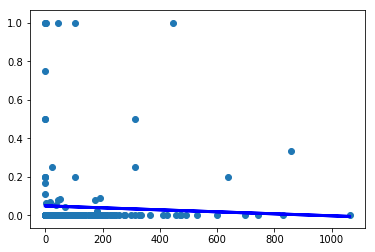

In [31]:
lm = LinearRegression()
X = added_ratios['$200,000 or more']
X = np.array(list(X)).reshape(-1, 1)
y = added_ratios['RATIO HEALTHY'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm.fit(X_train,y_train)
prediction =lm.predict(X_test)
plt.scatter(X_test, y_test)
# linear regression of ratio of healthy to number of people in the highest bracket
plt.plot(X_test, prediction, color='blue', linewidth=3)

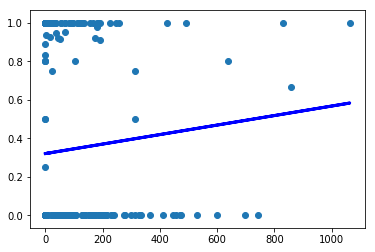

In [32]:
lm = LinearRegression()
X = added_ratios['$200,000 or more']
X = np.array(list(X)).reshape(-1, 1)
y = added_ratios['RATIO UNHEALTHY'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm.fit(X_train,y_train)
prediction =lm.predict(X_test)
plt.scatter(X_test, y_test)
# linear regression of ratio of unhealthy to number of people in the highest bracket
plt.plot(X_test, prediction, color='blue', linewidth=3)

PART 6

Generate a map showing the ratio of healthy and not healthy food options, and the locations of stores offering healthy food options.

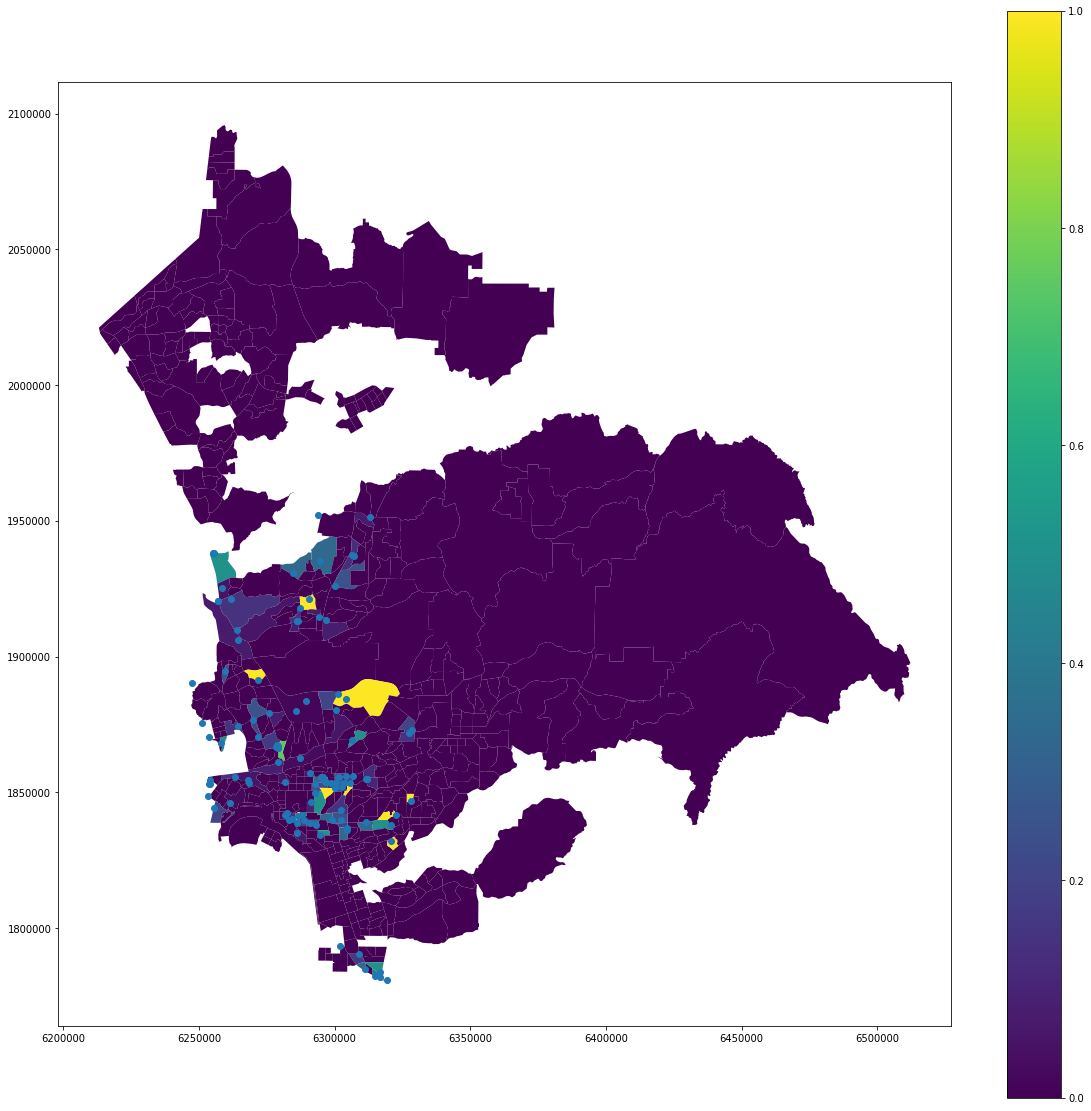

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
added_ratios.plot(column = 'RATIO HEALTHY', legend = True,ax=ax) # choropleth of the ratio of healthy 
healthy_stores.plot(ax=ax) # location of the stores 

__Problem 2 discussion of linear regression results:__

The different linear regressions tell us an interesting story that confirms our initial belief. Our first linear regression (unhealthy food, lowest bracket) shows a high correlation. The larger the number of people in the lower bracket, the higher the ratio of unhealthy food. The second linear regression (healthy food, lowest bracket) tells a much worse story, where the ratio of healthy food is relatively low throughout (and remains stagnant as the amount of people in the lower bracket increases). For our third linear regression (healthy food, highest bracket), the ratio of unhealthy food actually decreases as the numer of people in the highest bracket increases. This is the only time a ratio decreases as population increases. In our last linear regression (unhealthy food, highest bracket), the ratio increases, although not as nearly as strong as the lowest bracket.

## Responses to the extra credit questions:

Your text here

In [34]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [36]:
# Please let us know how much time you spent on this project, in hours: 
# (we will only examine distributions and won't look at individual responses)
assignment_timespent = 10
extracredit_timespent = 0